In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import os

%matplotlib inline
from utils import config
from utils.backtest import backtest_stats, backtest_plot, get_baseline

/opt/conda/lib/python3.6/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


## 数据读取

In [2]:
root_path = os.getcwd()
root_path = os.path.join(root_path, "train", "result")
print("root_path: ", root_path)

root_path:  /home/RL_in_Finance/train/result


In [3]:
path_dict = {}
for model in config.MODEL_LIST:
    model_path = os.path.join(root_path, model)
    path_dict[model] = os.path.join(model_path, "df_account_value_{}.csv".format(model))

In [4]:
a2c_account_value = pd.read_csv(path_dict["a2c"])
ddpg_account_value = pd.read_csv(path_dict["ddpg"])
ppo_account_value = pd.read_csv(path_dict["ppo"])
sac_account_value = pd.read_csv(path_dict["sac"])
td3_account_value = pd.read_csv(path_dict["td3"])

## 获取 baseline 的结果

In [5]:
baseline_df = get_baseline(config.SSE_50_INDEX, 
              start="20190101",
              end="20210101")
baseline_stats = backtest_stats(baseline_df, value_col_name='close')

--- 开始下载 ----
--- 下载完成 ----
DataFrame 的大小:  (487, 8)
Annual return          0.271107
Cumulative returns     0.589776
Annual volatility      0.189096
Sharpe ratio           1.366667
Calmar ratio           1.487275
Stability              0.618053
Max drawdown          -0.182284
Omega ratio            1.286287
Sortino ratio          1.953108
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.078570
Daily value at risk   -0.022798
dtype: float64


In [6]:
start_close_value = baseline_df.iloc[0]['close']
baseline_df['processed_close'] = ((baseline_df['close'] - start_close_value)/start_close_value + 1) * 1e+6

In [7]:
baseline_df.head()

,date,tic,open,high,low,close,volume,day,processed_close
0,2019-01-02,000016.SH,2262.7908,2298.1805,2301.0552,2252.7479,20880697.0,2,1.000000e+06
1,2019-01-03,000016.SH,2269.2430,2259.4825,2287.7778,2253.9433,18895240.0,3,1.000531e+06
2,2019-01-04,000016.SH,2314.6466,2252.7449,2316.3528,2249.3658,25900596.0,4,9.984987e+05
3,2019-01-07,000016.SH,2314.3193,2329.0316,2331.6031,2306.8979,25278948.0,0,1.024037e+06
4,2019-01-08,000016.SH,2305.1708,2312.1705,2312.1705,2298.9548,18131160.0,1,1.020511e+06


## 展示最终的结果

In [8]:
result_account_value = pd.DataFrame(data = {
                                        'a2c': a2c_account_value['total_assets'], 
                                        'ddpg': ddpg_account_value['total_assets'],
                                        'ppo': ppo_account_value['total_assets'],
                                        'sac': sac_account_value['total_assets'],
                                        'td3': td3_account_value['total_assets'],
                                        'baseline': baseline_df['processed_close']})

In [9]:
result_account_value = result_account_value.iloc[:-1].apply(lambda x : (x - 1e+6)/1e+6)

In [10]:
result_account_value.head()

,a2c,ddpg,ppo,sac,td3,baseline
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000269,-0.000502,-0.000259,-0.001233,-0.000103,0.000531
2,0.004095,0.004911,0.002477,0.005780,0.006844,-0.001501
3,0.005295,0.005382,0.002729,0.005793,0.007314,0.024037
4,0.002303,-0.000069,0.001246,0.001629,0.004409,0.020511


<AxesSubplot:>

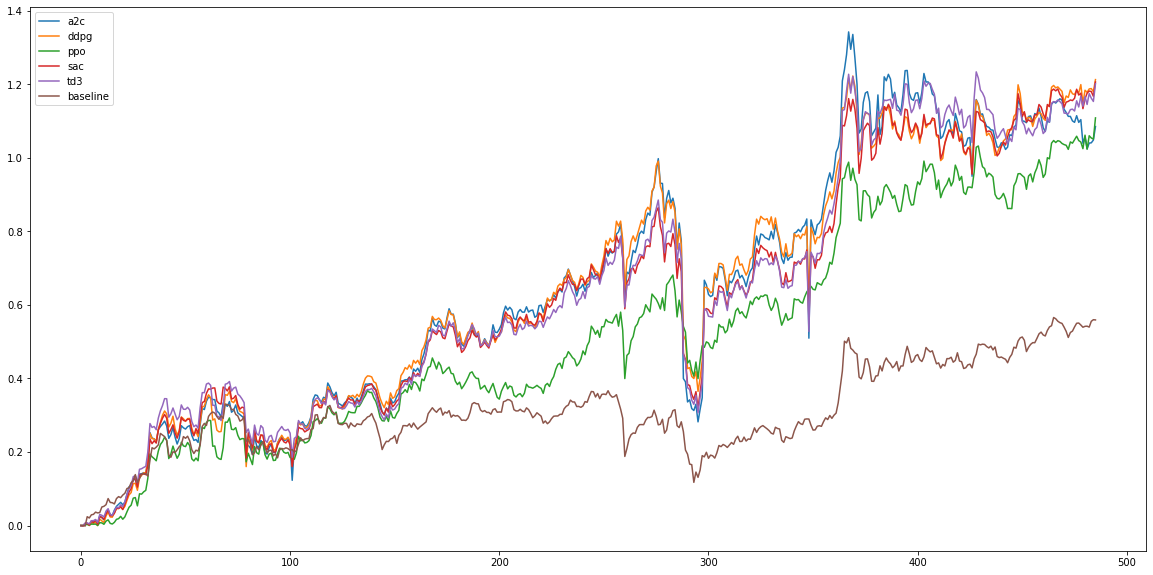

In [11]:
result_account_value.to_csv(os.path.join(root_path, "result_account_value.csv"), index=False)
result_account_value.plot(figsize = (20, 10))

## 展示 A2C 的回测结果

和 000016.SH 指数进行比较
--- 开始下载 ----
--- 下载完成 ----
DataFrame 的大小:  (487, 8)


Start date,2019-01-03
End date,2020-12-31
Total months,23
,Backtest
Annual return,46.371%
Cumulative returns,108.493%
Annual volatility,41.35%
Sharpe ratio,1.13
Calmar ratio,1.29
Stability,0.89
Max drawdown,-35.83%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.83,2020-02-26,2020-03-24,2020-07-02,92
1,16.76,2019-04-08,2019-06-06,2019-06-24,56
2,16.76,2020-07-10,2020-10-09,NaT,NaN
3,10.92,2020-01-23,2020-02-04,2020-02-18,19
4,6.42,2019-09-23,2019-10-21,2019-11-06,33


/opt/conda/lib/python3.6/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


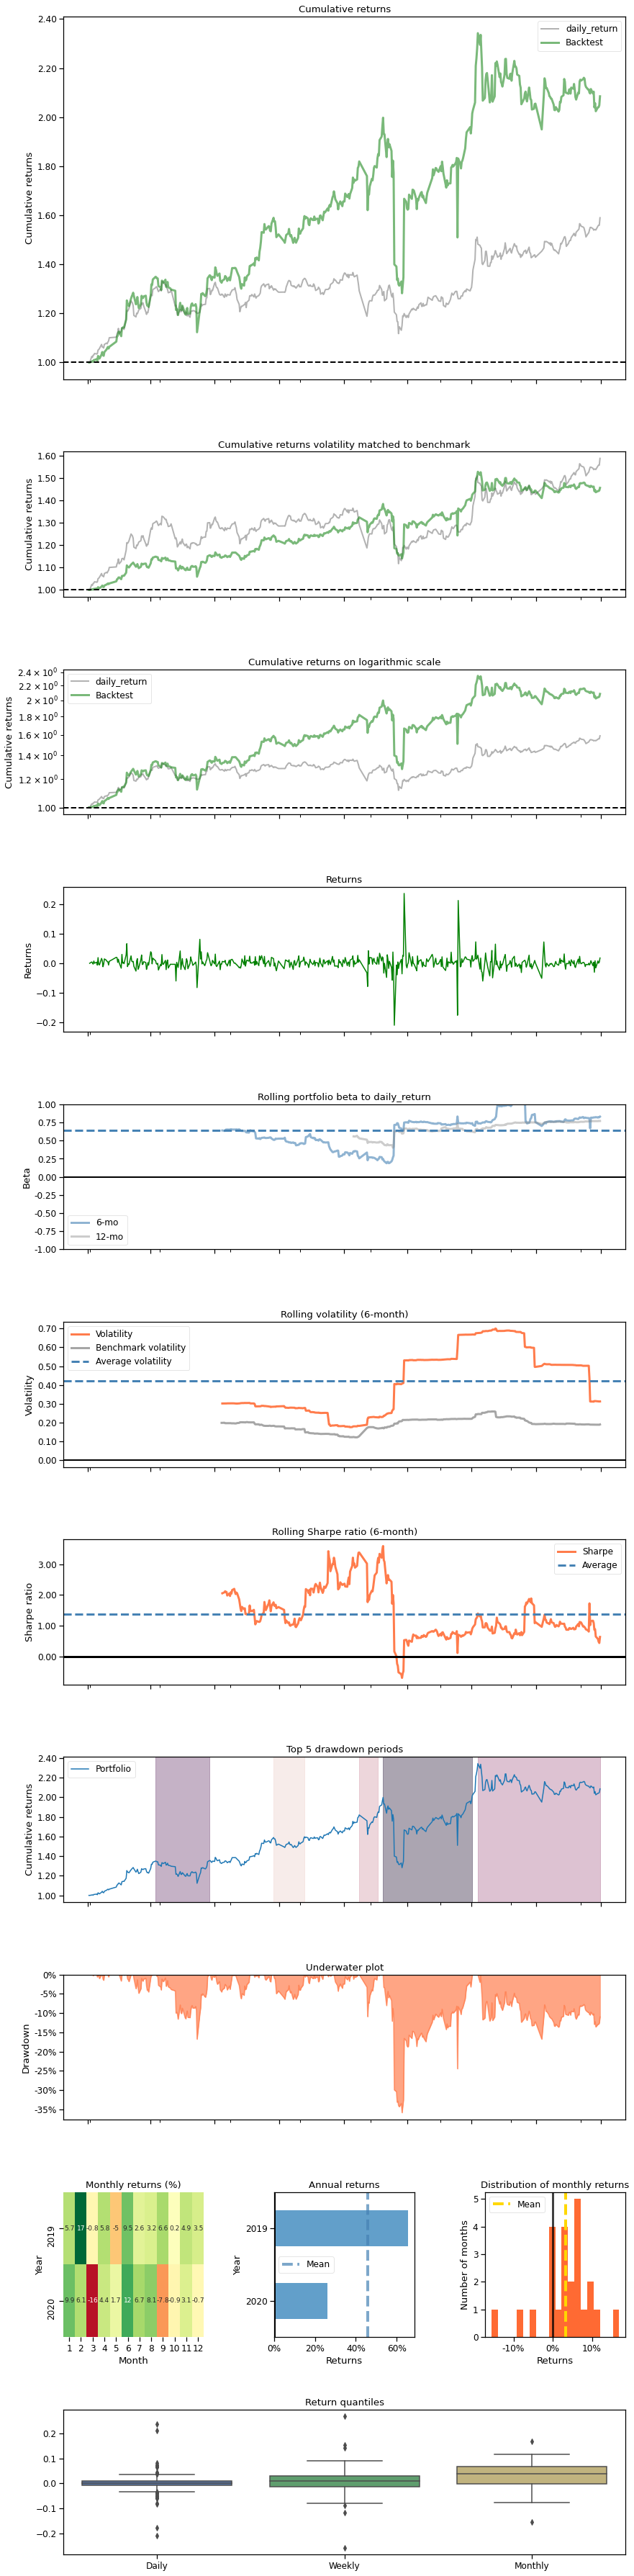

In [12]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(a2c_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 DDPG 的回测结果

和 000016.SH 指数进行比较
--- 开始下载 ----
--- 下载完成 ----
DataFrame 的大小:  (487, 8)


Start date,2019-01-03
End date,2020-12-31
Total months,23
,Backtest
Annual return,50.953%
Cumulative returns,121.264%
Annual volatility,33.268%
Sharpe ratio,1.41
Calmar ratio,1.62
Stability,0.92
Max drawdown,-31.454%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,31.45,2020-02-26,2020-03-24,2020-07-06,94
1,15.01,2019-04-22,2019-05-07,2019-07-02,52
2,11.86,2020-07-14,2020-10-09,NaT,NaN
3,10.26,2020-01-23,2020-02-04,2020-02-14,17
4,7.44,2019-04-08,2019-04-15,2019-04-18,9


/opt/conda/lib/python3.6/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


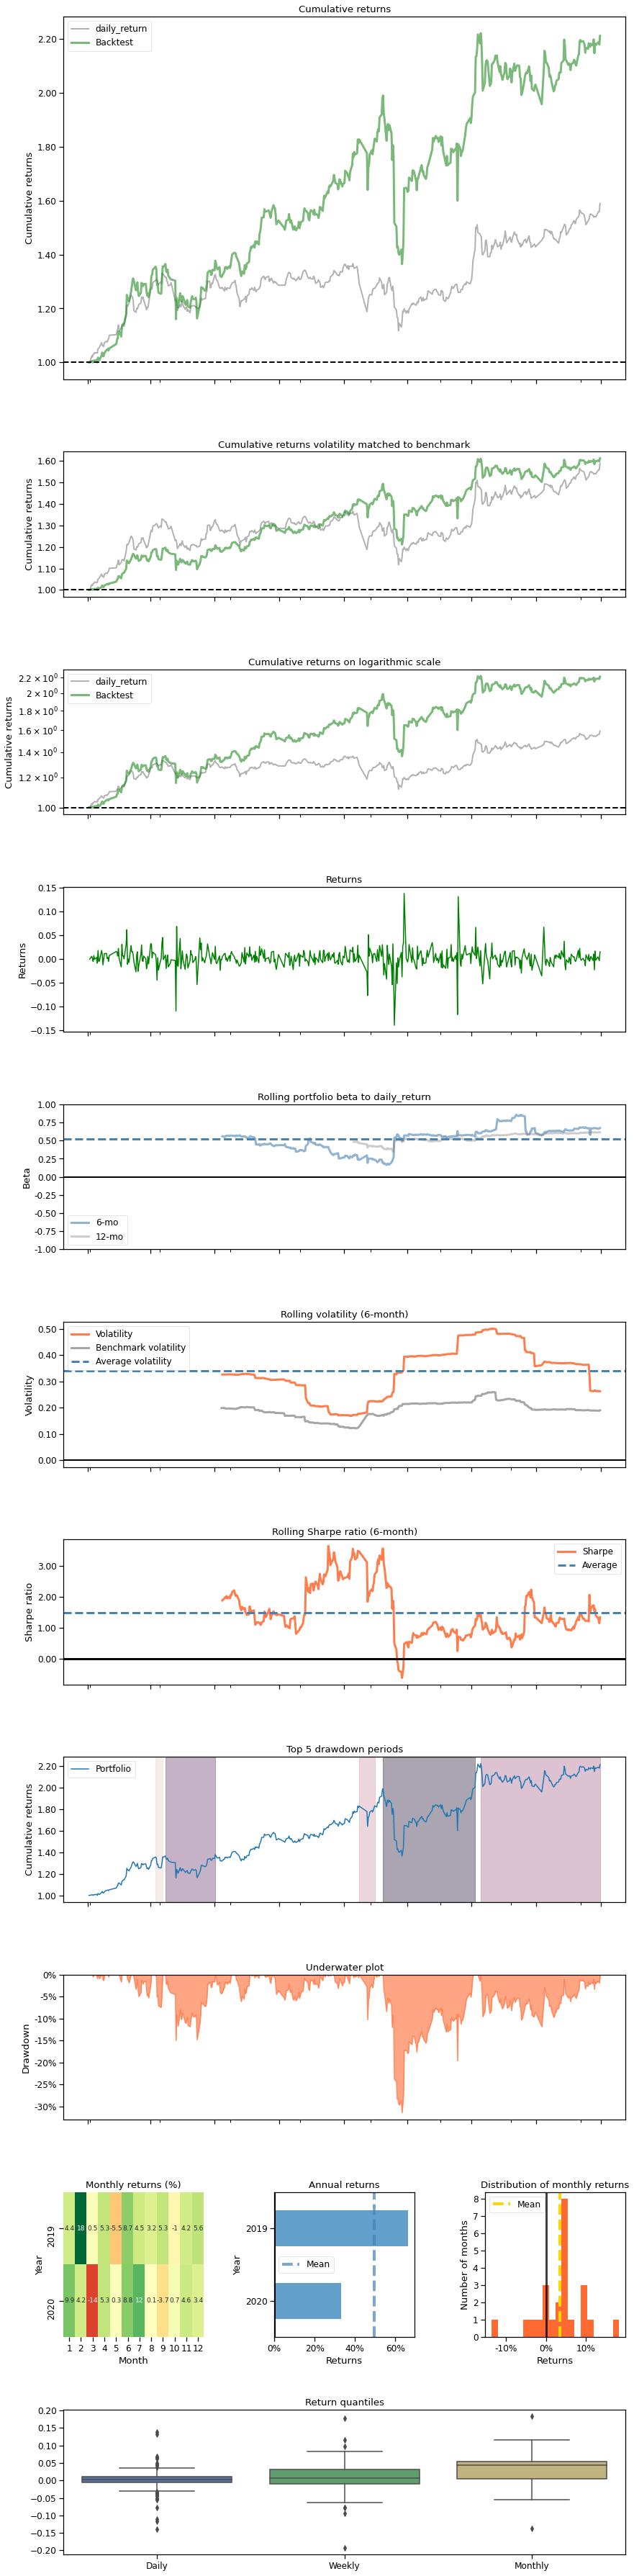

In [13]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(ddpg_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 PPO 的回测结果

和 000016.SH 指数进行比较
--- 开始下载 ----
--- 下载完成 ----
DataFrame 的大小:  (487, 8)


Start date,2019-01-03
End date,2020-12-31
Total months,23
,Backtest
Annual return,47.228%
Cumulative returns,110.854%
Annual volatility,24.284%
Sharpe ratio,1.72
Calmar ratio,2.82
Stability,0.94
Max drawdown,-16.747%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.75,2020-03-06,2020-03-24,2020-06-24,79
1,11.43,2020-01-23,2020-02-04,2020-02-18,19
2,9.82,2019-04-22,2019-05-10,2019-06-28,50
3,8.38,2020-10-14,2020-11-05,2020-12-02,36
4,8.25,2019-04-08,2019-04-16,2019-04-22,11


/opt/conda/lib/python3.6/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


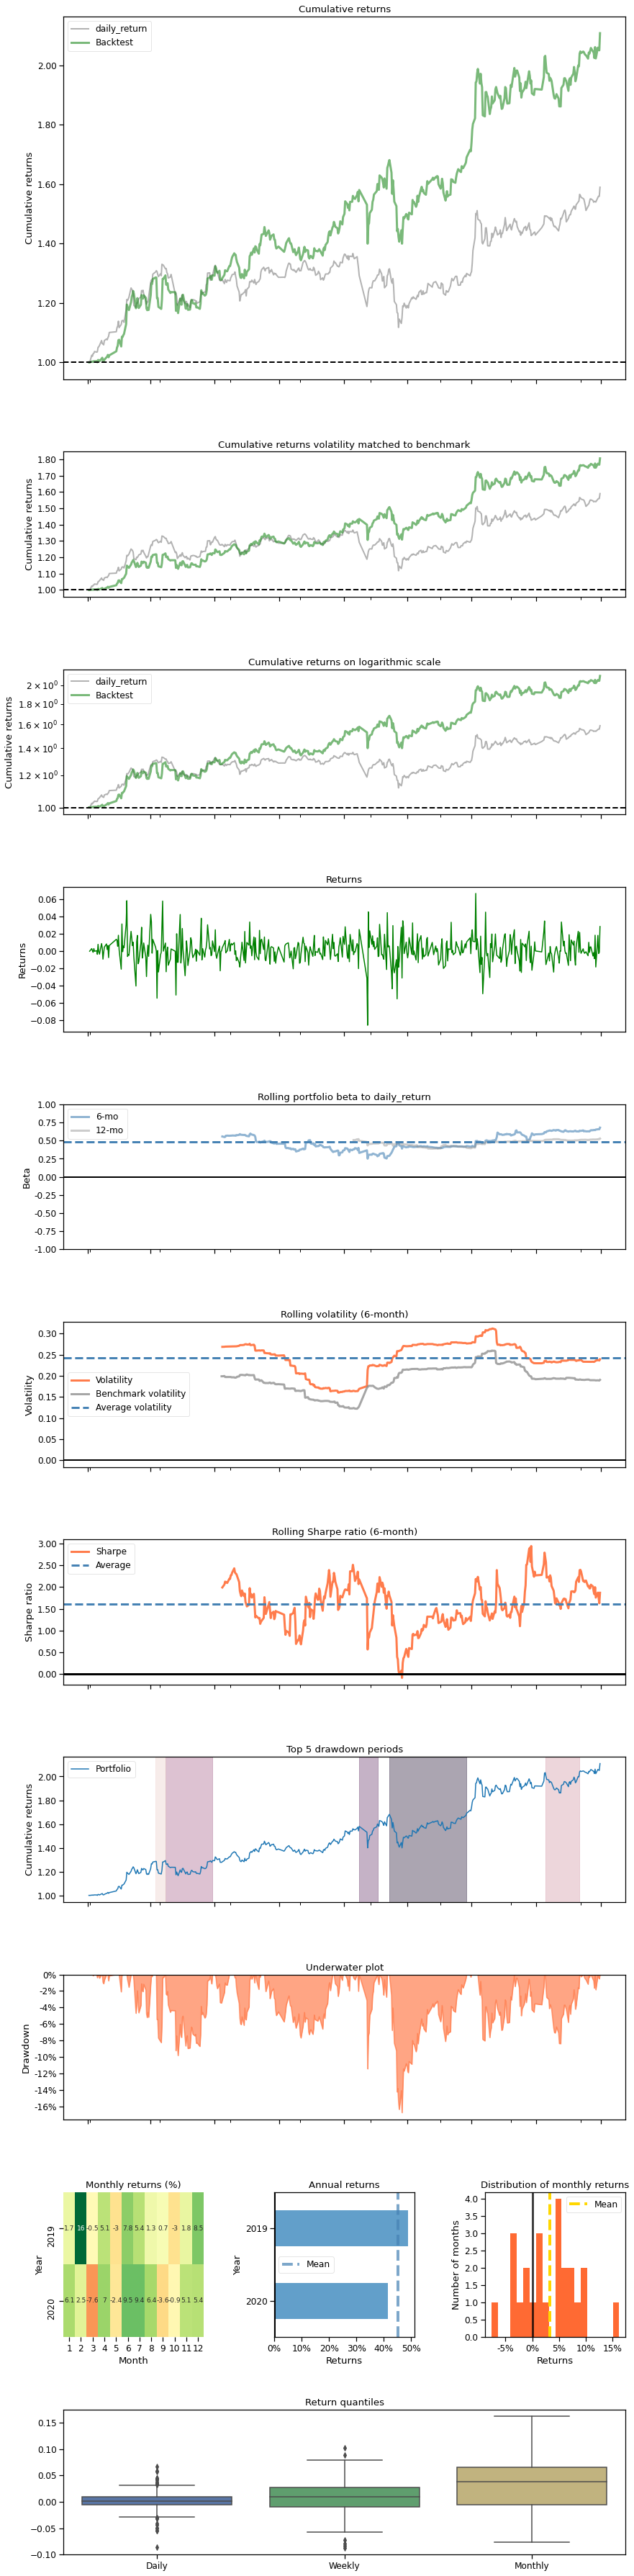

In [14]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(ppo_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 SAC 的回测结果

和 000016.SH 指数进行比较
--- 开始下载 ----
--- 下载完成 ----
DataFrame 的大小:  (487, 8)


Start date,2019-01-03
End date,2020-12-31
Total months,23
,Backtest
Annual return,50.722%
Cumulative returns,120.612%
Annual volatility,31.394%
Sharpe ratio,1.47
Calmar ratio,1.73
Stability,0.91
Max drawdown,-29.239%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,29.24,2020-02-26,2020-03-24,2020-07-02,92
1,15.76,2019-04-22,2019-06-06,2019-07-29,71
2,11.12,2020-01-21,2020-02-04,2020-02-21,24
3,9.51,2020-07-10,2020-10-09,2020-11-10,88
4,6.07,2019-07-31,2019-08-08,2019-08-21,16


/opt/conda/lib/python3.6/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


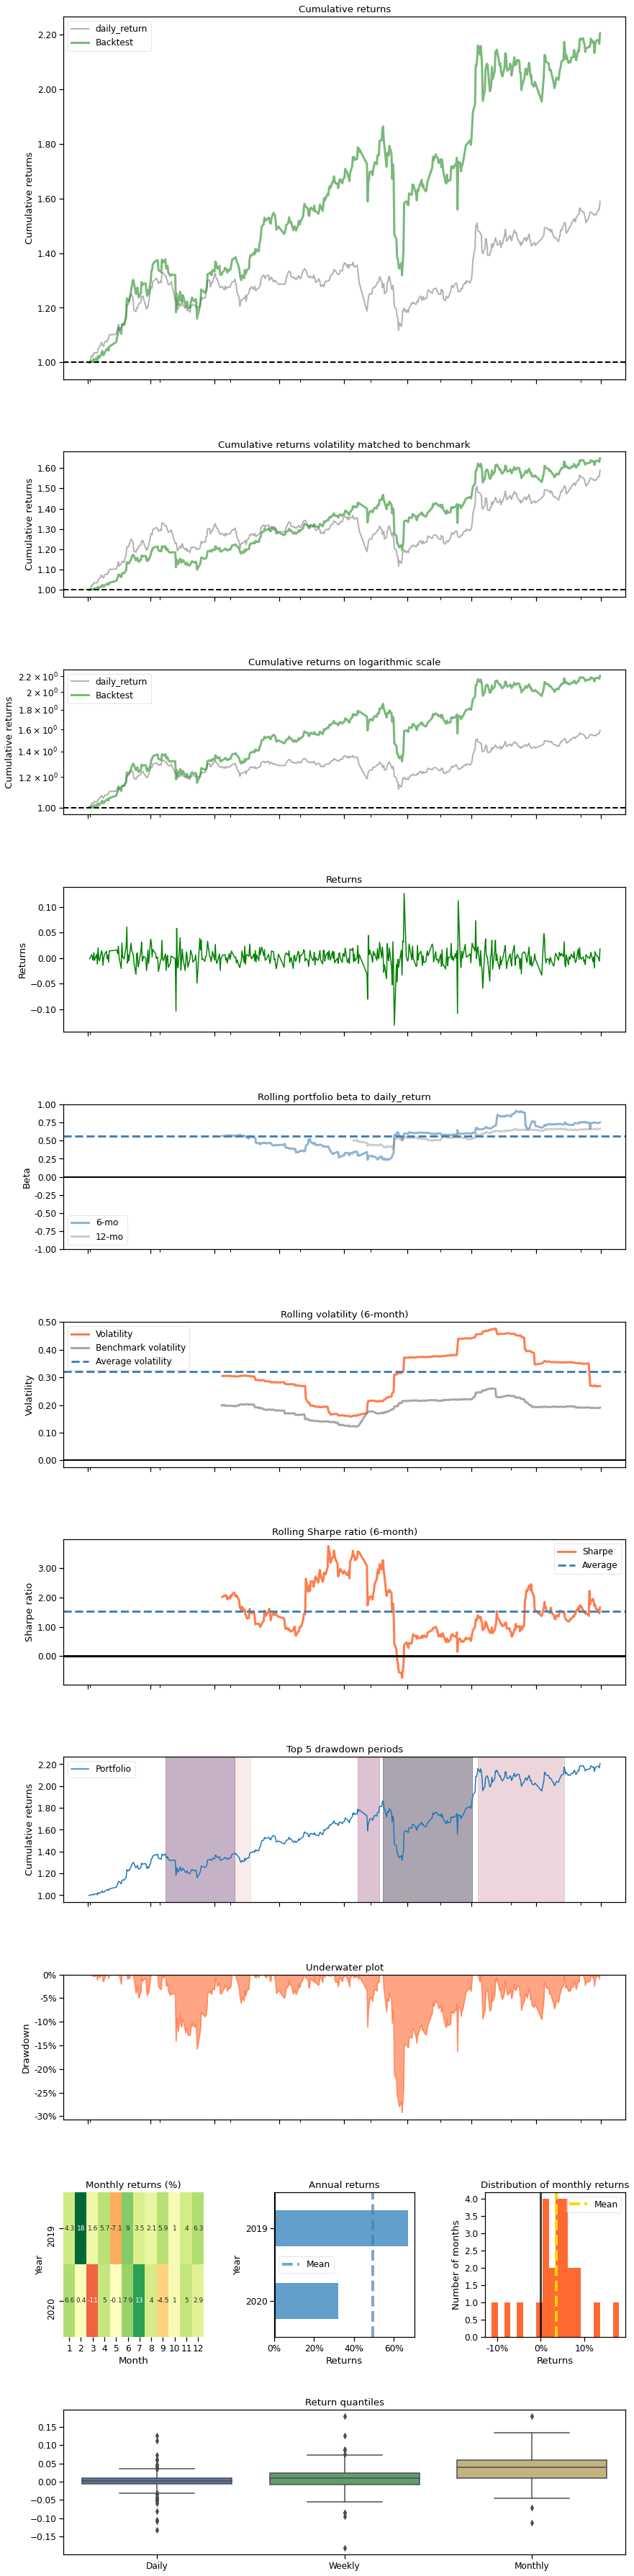

In [15]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(sac_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 TD3 的回测结果

和 000016.SH 指数进行比较
--- 开始下载 ----
--- 下载完成 ----
DataFrame 的大小:  (487, 8)


Start date,2019-01-03
End date,2020-12-31
Total months,23
,Backtest
Annual return,50.554%
Cumulative returns,120.136%
Annual volatility,32.713%
Sharpe ratio,1.42
Calmar ratio,1.65
Stability,0.90
Max drawdown,-30.691%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,30.69,2020-02-26,2020-03-24,2020-07-02,92
1,14.82,2019-04-22,2019-06-06,2019-08-26,91
2,10.80,2020-01-23,2020-02-04,2020-02-21,22
3,9.45,2020-07-10,2020-07-17,2020-10-13,68
4,8.74,2020-10-13,2020-11-03,NaT,NaN


/opt/conda/lib/python3.6/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


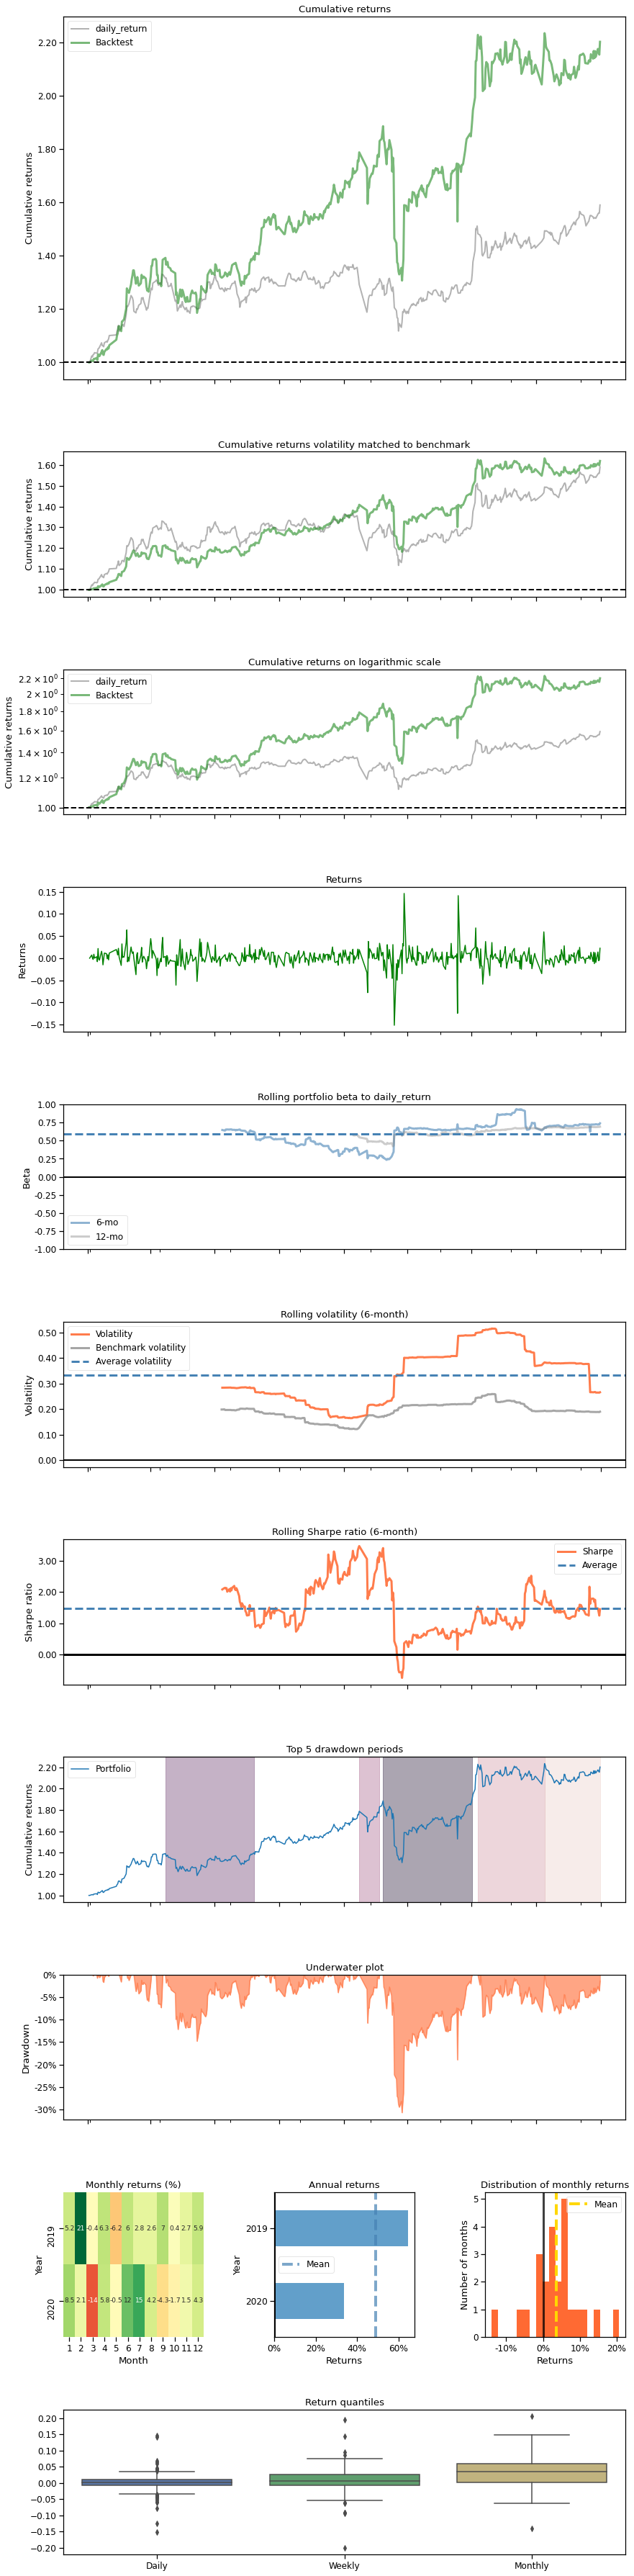

In [16]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(td3_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )